## IMPORTANT
Hi there,
Thanks for visiting. I am new to Data Science and trying to learn the best practices. **Pls upvote** this notebook and **pls leave a comment as to how can I improve my work**. It really feels good 
Thanks and now let's dive deep into this analysis.

## **RMS Titanic**
![image](https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg)

## Brief History
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated **2,224 passengers** and crew aboard, more than **1,500 died**, making it one of modern history's deadliest commercial marine disasters during peacetime. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.

Titanic was under the command of Capt. Edward Smith, who also went down with the ship.  Although Titanic had advanced safety features such as watertight compartments and remotely activated watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board, and one third of her total capacity—due to outdated maritime safety regulations. The ship carried 16 lifeboat davits which could lower three lifeboats each, for a total of 48 boats. However, Titanic carried only a total of 20 lifeboats, four of which were collapsible and proved hard to launch during the sinking.

After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York. On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she **hit an iceberg at 11:40 p.m. ship's time**.

## Setting Up

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import tensorflow as tf 
%matplotlib inline
import warnings;
warnings.filterwarnings("ignore");
import os
print(os.listdir("../input"))

['gender_submission.csv', 'test.csv', 'train.csv']


## Importing Data

In [42]:
data = pd.read_csv("../input/train.csv")
test_sur = pd.read_csv("../input/gender_submission.csv")
test = pd.read_csv("../input/test.csv")

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So our data has some missing values.
Lets visualize them.

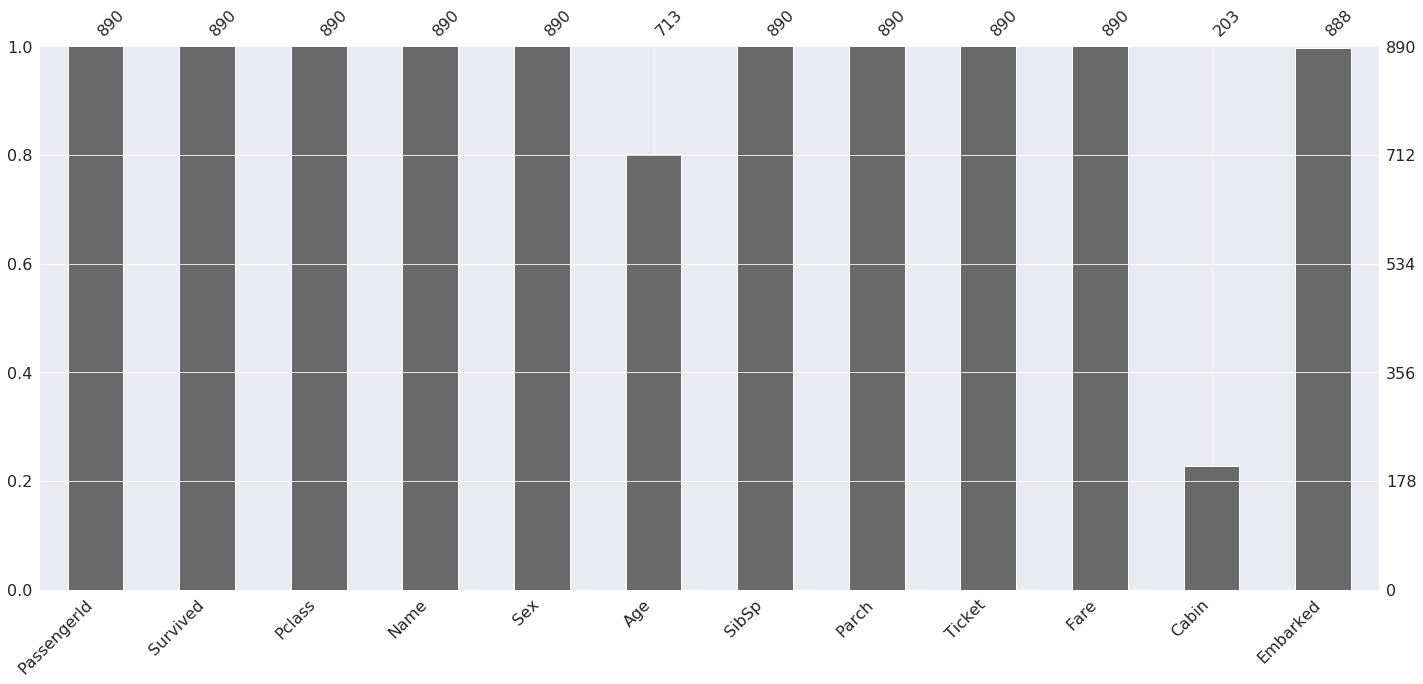

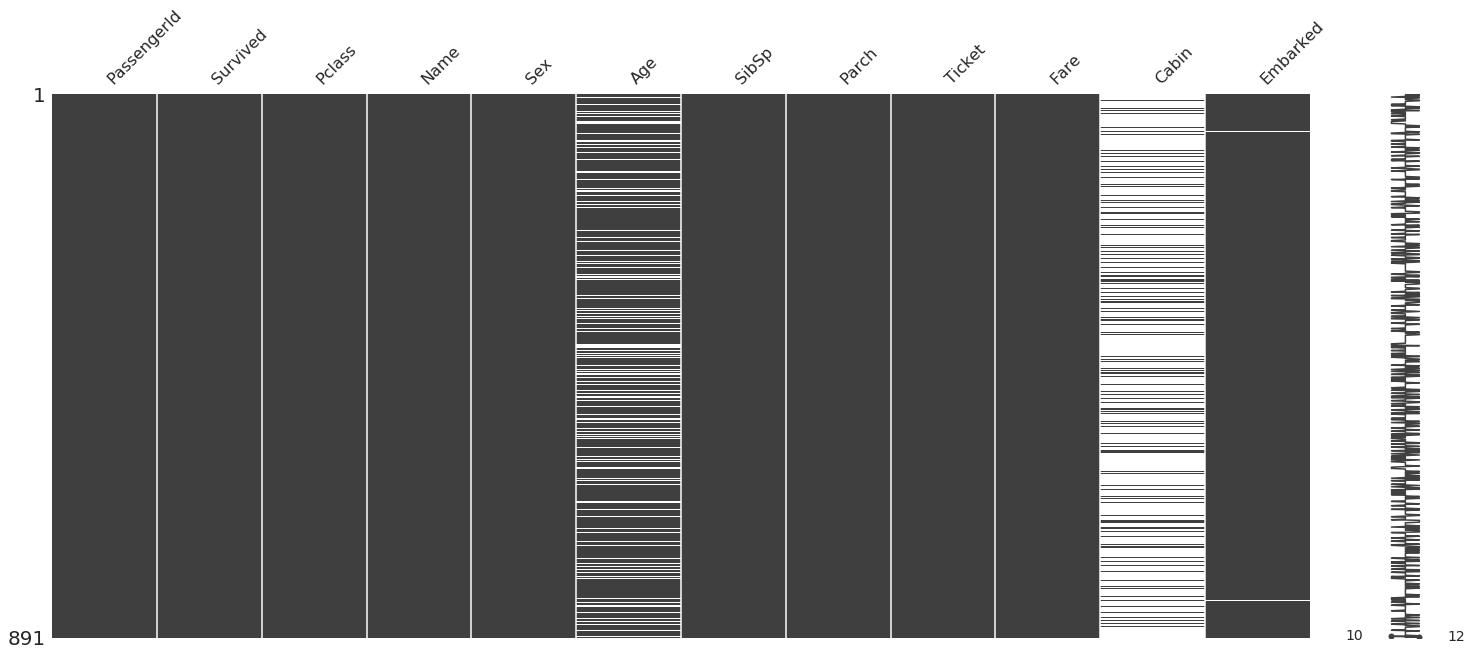

In [46]:
import missingno as msno
msno.bar(data.sample(890))
msno.matrix(data)

## Lets handle these missing values(Data Preprocessing)

Removing name, ticket number and passengerid as they are not important features in predicting if a passenger will die or survive.
Also removing cabin no because it contains a lot of nan values.

In [47]:
data = data.drop(columns = ['Name','Ticket','Cabin','PassengerId'])
data['Age'][np.isnan(data['Age'])] = np.nanmedian(data['Age'])
data = data.dropna()

In [48]:
test_sur.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
test = test.drop(columns = ['Name','Ticket','Cabin','PassengerId'])
test['Age'][np.isnan(test['Age'])] = np.nanmedian(test['Age'])
test['Fare'][np.isnan(test['Fare'])] = np.nanmedian(test['Fare'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [51]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


That looks much better!

## Getting Some Insights From The Data

lets see some basic correlations in out data.

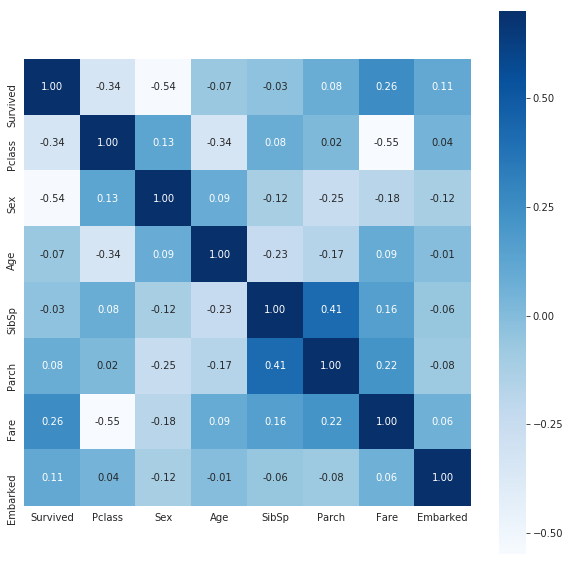

In [52]:
test_df = data.copy()
map1 = {"female":0 , "male":1}
map2 = {"S":0 , "C":1 , "Q":2}
test_df['Sex']=test_df.Sex.map(map1)
test_df["Embarked"] = test_df.Embarked.map(map2)
corr_map = test_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_map,vmax=.7, square=True,annot=True,fmt=".2f",cmap='Blues')

### Some important inferences.
* Fare and passenger class have a negative correlation. It means that as fare increases class becomes better.
* Fare and survival have some positive correlation meaning rich have more probability of survival, or maybe they were preferred during evacuation.
* No of siblings and no of parents on board have a high correlation.
* Fare and Parch are correlated meaning that those travelling with there children or parents prefer higher class compartments.
* Female had more probability of having parents or children onboard.
* Younger travellers had more no of siblings or spouse on board for obvious reasons.
* Age and Pclass have -ve correlation meaning older travellers preferred better class.
* Female passengers have a very high chance of survival than male passengers meaning female passengers were preferred during evacuation.
* Also pclass and survival are correlated meaning elite passengers were preferred during evacuation.

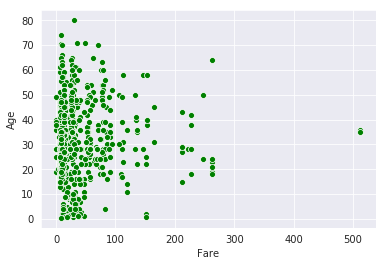

In [53]:
sns.scatterplot(data["Fare"],data["Age"],color='Green')

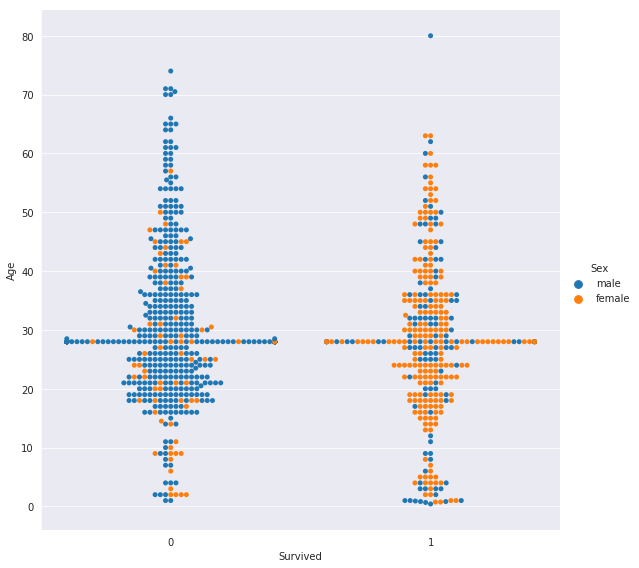

In [54]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="swarm", data=data, aspect=1,height=8);

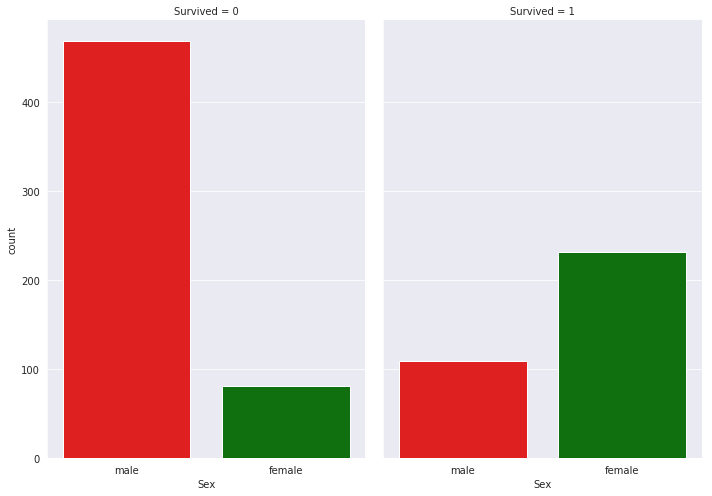

In [55]:
sns.factorplot(x="Sex",col="Survived", data=data , kind="count",size=7, aspect=.7,palette=['red','green'])

### It is clearly visible from above 2 plots that mostly female passengers and specially younger girls were the most prefered during evacution.

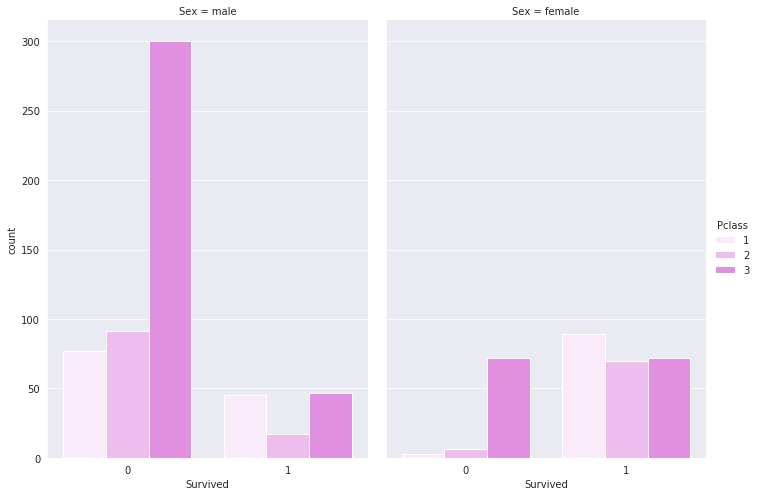

In [56]:
sns.catplot(x="Survived",hue="Pclass", kind="count",col='Sex', data=data,color='Violet',aspect=0.7,height=7);

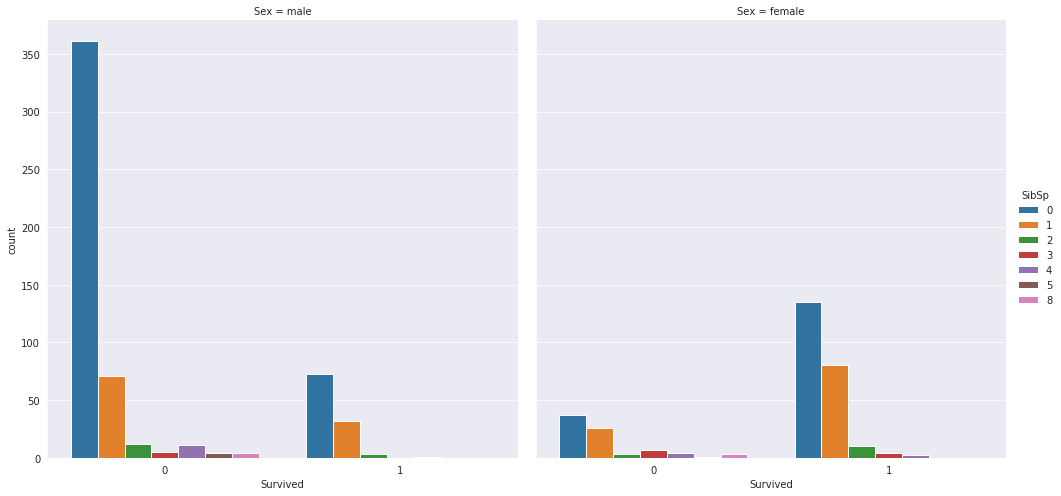

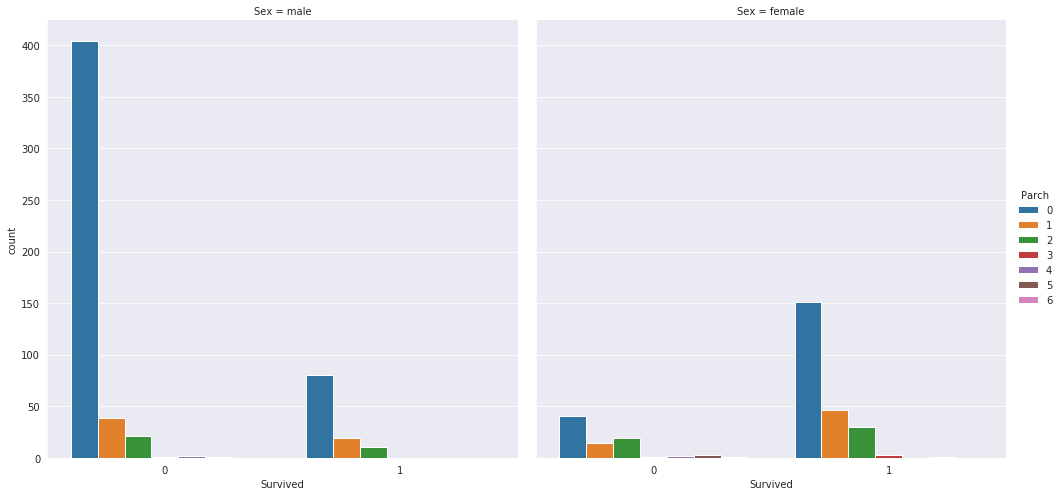

In [57]:
sns.catplot(x="Survived", hue="SibSp", col = 'Sex',kind="count", data=data,height=7);
sns.catplot(x="Survived", hue="Parch", col = 'Sex', kind="count", data=data,height=7);

Now, this gives a very good insight about family and gender relations.
Female passengers were helped by there family males so they have higher survival rate in case if there family is onboard.
But it was just the opposite for males as they were not prefered and thus most of them died saving there families.

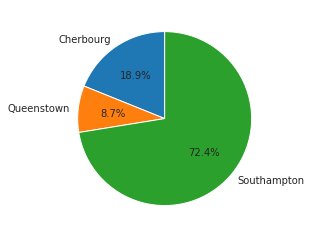

In [58]:
emb =data.groupby('Embarked').size()

plt.pie(emb.values,labels = ["Cherbourg","Queenstown","Southampton"],startangle=90,autopct='%1.1f%%');

#### Most of the passengers were from Southampton. Also Southampton was the starting port of its journey.
![image](https://titanicfacts.net/wp-content/uploads/2018/06/titanic-maiden-voyage-route.gif)

In [59]:
pd.crosstab([data.Sex,data.Survived],data.Pclass, margins=True).style.background_gradient(cmap='gist_rainbow')

In [60]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


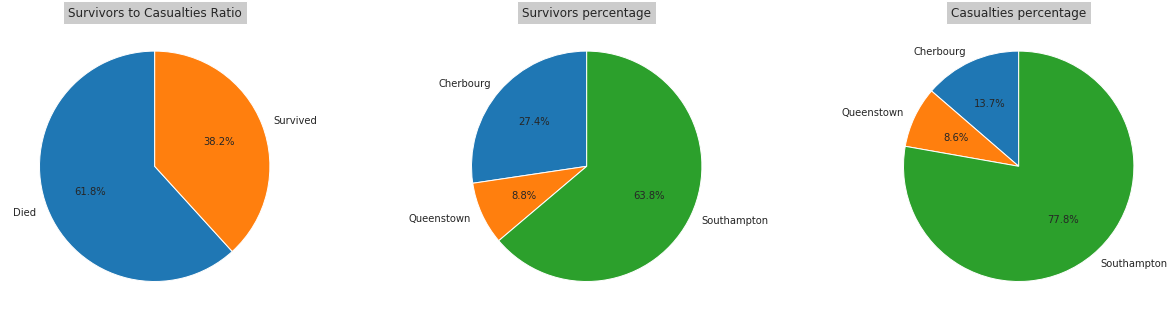

In [61]:
surv =data.groupby('Survived').size()
emb_sur = data[data['Survived']==1].groupby('Embarked').size()
emb_die = data[data['Survived']==0].groupby('Embarked').size()

pie_index = ['Cherbourg','Queenstown','Southampton']

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 1], aspect=1)
ax1.pie(surv.values,labels=['Died','Survived'],startangle=90,autopct='%1.1f%%')
plt.title('Survivors to Casualties Ratio',bbox={'facecolor':'0.8', 'pad':5})

ax2 = fig.add_axes([1, 0, 1, 1], aspect=1)
plt.title('Survivors percentage',bbox={'facecolor':'0.8', 'pad':5})
ax2.pie(emb_sur.values,labels = pie_index,startangle = 90, autopct='%1.1f%%')

ax3 = fig.add_axes([2, 0, 1, 1], aspect=1)
plt.title('Casualties percentage',bbox={'facecolor':'0.8', 'pad':5})
ax3.pie(emb_die.values,labels = pie_index,startangle = 90, autopct='%1.1f%%')

plt.show()      

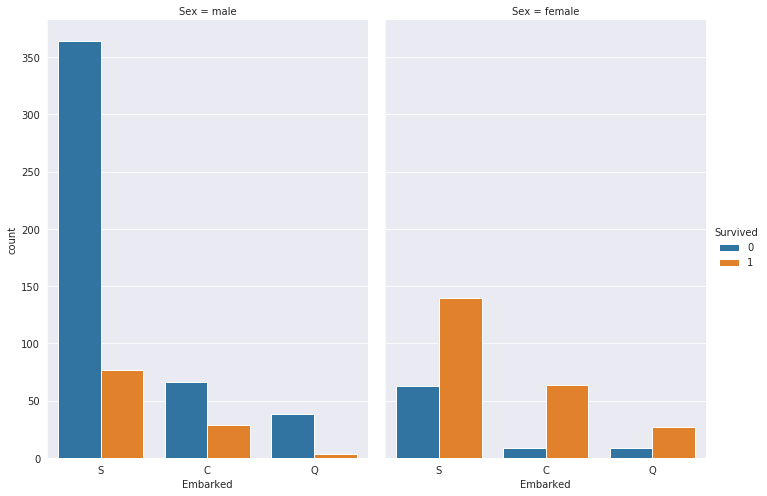

In [62]:
sns.catplot(x="Embarked",hue="Survived", kind="count",col='Sex', data=data,aspect=0.7,height=7);

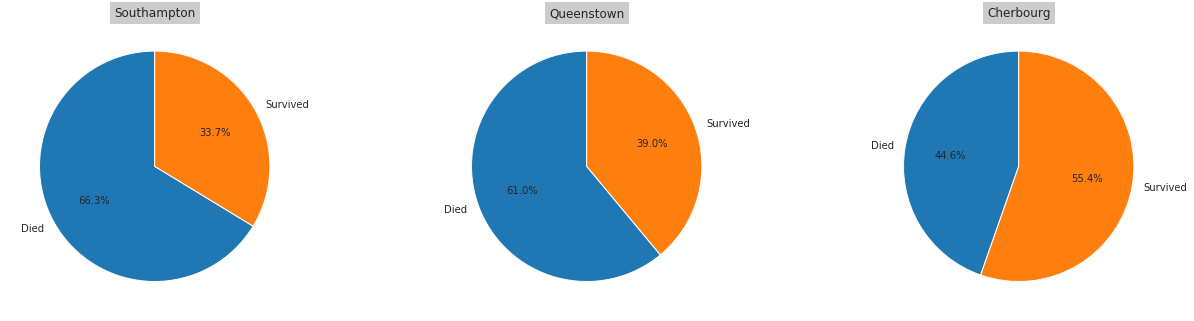

In [63]:
emb_smt = data[data['Embarked']=='S'].groupby('Survived').size()
emb_que = data[data['Embarked']=='Q'].groupby('Survived').size()
emb_che = data[data['Embarked']=='C'].groupby('Survived').size()

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1,1], aspect=1)
ax1.pie(emb_smt.values,labels = ['Died','Survived'],startangle = 90, autopct='%1.1f%%')
plt.title('Southampton',bbox={'facecolor':'0.8', 'pad':5})
ax2 = fig.add_axes([1, 0, 1,1], aspect=1)
ax2.pie(emb_que.values,labels = ['Died','Survived'],startangle = 90, autopct='%1.1f%%')
plt.title('Queenstown',bbox={'facecolor':'0.8', 'pad':5})
ax3 = fig.add_axes([2,0, 1,1], aspect=1)
ax3.pie(emb_che.values,labels = ['Died','Survived'],startangle = 90, autopct='%1.1f%%')
plt.title('Cherbourg',bbox={'facecolor':'0.8', 'pad':5})
plt.show()      

### From the above Pie charts it could be seen that, opposing the general trend, Cherbourg has more survivors than casualties. Whereas Southampton has most no of casualties.
This could be because of many reasons: 
* One of them could be that some are better swimmers.
* Other could be that passengers from Cherbourg have more no of female passengers.

## Training on different models.

In [64]:
#Converting text data to numerical
map1 = {"female":0 , "male":1}
map2 = {"S":0 , "C":1 , "Q":2}
data['Sex']=data.Sex.map(map1)
data["Embarked"] = data.Embarked.map(map2)
test['Sex']=test.Sex.map(map1)
test["Embarked"] = test.Embarked.map(map2)
#one hot encoding
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [65]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [66]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


### Now lets create some creative new features using the existing ones.

In [67]:
data['Family'] = data.Parch+data.SibSp
data.Age = data.Age/np.mean(data.Age)
data.Fare = data.Fare/np.mean(data.Fare)
test['Family'] = test.Parch+test.SibSp
test.Age = test.Age/np.mean(test.Age)
test.Fare = test.Fare/np.mean(test.Fare)

In [68]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,0.750465,1,0,0.225880,0,1
1,1,1,0,1.296258,1,0,2.220893,1,1
2,1,3,0,0.886913,0,0,0.246910,0,0
3,1,1,0,1.193922,1,0,1.654377,0,1
4,0,3,1,1.193922,0,0,0.250805,0,0


In [69]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,1,1.165569,0,0,0.220066,2,0
1,3,0,1.587876,1,0,0.196759,0,1
2,2,1,2.094645,0,0,0.272300,2,0
3,3,1,0.912184,0,0,0.243489,0,0
4,3,0,0.743261,1,1,0.345382,0,2


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=0.3)
#using 70:30 split.

In [71]:
print(x_train.head())
print(y_train.head())

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Family
94        3    1  2.012611      0      0  0.225880         0       0
99        2    1  1.159810      1      0  0.810053         0       1
811       3    1  1.330370      0      0  0.752414         0       0
843       3    1  1.176866      0      0  0.200566         1       0
364       3    1  0.955137      1      0  0.482916         2       1
94     0
99     0
811    0
843    0
364    0
Name: Survived, dtype: int64


In [72]:
classifiers=[['Logistic Regression :',LogisticRegressionCV()],
             ['SVM:',svm.LinearSVC()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.7865168539325843
SVM: 0.7790262172284644
Decision Tree Classification : 0.7191011235955056
Random Forest Classification : 0.7790262172284644
Gradient Boosting Classification : 0.8127340823970037
Ada Boosting Classification : 0.797752808988764
Extra Tree Classification : 0.7715355805243446
K-Neighbors Classification : 0.7265917602996255
Support Vector Classification : 0.7940074906367042
Gaussian Naive Bayes : 0.8052434456928839


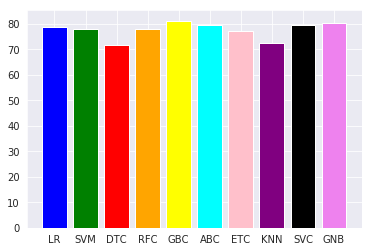

In [73]:
plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=np.multiply(cla_pred,100)
        ,tick_label=['LR','SVM','DTC', 'RFC', 'GBC', 'ABC', 'ETC', 'KNN', 'SVC','GNB']
        , color=["Blue","Green","red","orange","Yellow","cyan","pink","purple","black","violet"])
plt.show()

## Lets try Neural Networks to get a better classifier 

In [74]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [75]:
from keras.utils import np_utils 
y_train = np_utils.to_categorical(y_train, 2) 
y_test = np_utils.to_categorical(y_test, 2)

In [76]:
def clf_model():
    model=Sequential()
    model.add(Dense(8,input_dim=8,kernel_initializer='normal',activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [77]:
model = clf_model()

In [78]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=20, batch_size=5, verbose=1)

Train on 622 samples, validate on 267 samples
Epoch 1/20
622/622 [==============================] - 1s 1ms/step - loss: 0.6368 - acc: 0.6206 - val_loss: 0.6004 - val_acc: 0.6517
Epoch 2/20
622/622 [==============================] - 0s 749us/step - loss: 0.5609 - acc: 0.7058 - val_loss: 0.5261 - val_acc: 0.7715
Epoch 3/20
622/622 [==============================] - 0s 717us/step - loss: 0.4971 - acc: 0.7669 - val_loss: 0.4858 - val_acc: 0.8090
Epoch 4/20
622/622 [==============================] - 0s 728us/step - loss: 0.4647 - acc: 0.7942 - val_loss: 0.4826 - val_acc: 0.7903
Epoch 5/20
622/622 [==============================] - 0s 748us/step - loss: 0.4573 - acc: 0.7942 - val_loss: 0.4886 - val_acc: 0.7903
Epoch 6/20
622/622 [==============================] - 0s 735us/step - loss: 0.4439 - acc: 0.8071 - val_loss: 0.4787 - val_acc: 0.7865
Epoch 7/20
622/622 [==============================] - 0s 754us/step - loss: 0.4376 - acc: 0.8071 - val_loss: 0.4839 - val_acc: 0.7940
Epoch 8/20
622/622

In [79]:
score = model.evaluate(x_test,y_test)
print(score)

267/267 [==============================] - 0s 54us/step
[0.45962505494610645, 0.7827715364734779]


In [80]:
test_sur['Survived']=model.predict_classes(test)
test_sur.to_csv('submit.csv',index=False)

**So even with neural networks the best we can get is around 80% accuracy after which it starts overfitting and validation accuracy starts falling.**